# STUDY : TINDER

### LIBRAIRIES

In [2]:
## DATA -----------------------------------------------------------------------
import pandas as pd
pd.set_option("display.max_columns", 500)
import numpy as np


## CHARTS ---------------------------------------------------------------------

# Pyplot
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns
sns.set_theme(style="whitegrid")

# Plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "vscode"
from plotly.subplots import make_subplots


## STATISTICS -----------------------------------------------------------------
from scipy.stats import norm


## MACHINE LEARNING -----------------------------------------------------------

# Dataset Splitting
from sklearn.model_selection import train_test_split

# Missing Values Replacing
from sklearn.impute import SimpleImputer

# Dataset Splitting
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder


# MODELS ---------------------------------------------------------------------

## Regression
from sklearn.linear_model import LinearRegression

## Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# MATRIX ---------------------------------------------------------------------
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# TREE -----------------------------------------------------------------------
from sklearn import tree

### IMPORT

In [3]:
imp = pd.read_csv("src/Speed_Dating.csv", encoding= "ISO-8859-1")
df= imp.copy()

In [4]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

### GENERAL UNDERSTANDING

    ATTR_0 (PEOPLE'S RATING)

Rating for all 6 Attributes\
Rating by partner the night of the event, for all 6 attributes\
[Attractive, Sincere, Intelligent, Fun, Ambitious, Shared Interests]

    ATTR_1 (EXPECTATIONS)

We want to know what you look for in the opposite sex.

    ATTR_2 (PEOPLE'S CRITERIA OF A DATE)

What do you think the opposite sex looks for in a date?

    ATTR_3 (SELF RATING)

How do you think you measure up?
Please rate your opinion of your own attributes, on a scale of 1-10 (be honest!)

    ATTR_4 (PEOPLE'S CRITERIA)

Now we want to know what you think MOST of your fellow men/women look for in the opposite sex.

    ATTR_5 (PEOPLE'S PERCEPTION OF YOU)

And finally, how do you think others perceive you?

### CLEANING

In [5]:
# The feature "Wave" is not based on the same evaluation method.
# Hence the choice of dropping certain values (6 to 9)

# Mask of values 6 to 9 ---
mask_drop_6_9 = (df["wave"] != 6) & (df["wave"] != 7) & (df["wave"] != 8) & (df["wave"] != 9)

# Drop associated ---
df = df[mask_drop_6_9]

# Display ---
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

### DATA PROCESSING

##### ATTRIBUTES DATASETS PER QUESTION / TIME

In [6]:
# Features masks ---
mask_attributes_0_0 = ["iid", "attr_o", "sinc_o", "intel_o", "fun_o", "amb_o", "shar_o", "wave", "dec_o", "match", "pid", "gender"]
mask_attributes_1_1 = ["iid", "attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1", "wave", "dec_o", "match", "pid", "gender"]
mask_attributes_2_1 = ["iid", "attr2_1", "sinc2_1", "intel2_1", "fun2_1", "amb2_1", "shar2_1", "wave", "dec_o", "match", "pid", "gender"]
mask_attributes_3_1 = ["iid", "attr3_1", "sinc3_1", "intel3_1", "fun3_1", "amb3_1", "wave", "dec_o", "match", "pid", "gender"]
mask_attributes_4_1 = ["iid", "attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1", "wave", "dec_o", "match", "pid", "gender"]
mask_attributes_5_1 = ["iid", "attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1", "wave", "dec_o", "match", "pid", "gender"]

# Associated dataframes ---
df0_0 = df[mask_attributes_0_0]
df1_1 = df[mask_attributes_1_1]
df2_1 = df[mask_attributes_2_1]
df3_1 = df[mask_attributes_3_1]
df4_1 = df[mask_attributes_4_1]
df5_1 = df[mask_attributes_5_1]

##### PARTNER'S MATCH DECISIONS

In [64]:
# Pass ---
df_decisions_0 = df0_0[(df0_0["dec_o"] == 0)]

# Match ---
df_decisions_1 = df0_0[(df0_0["dec_o"] == 1)]

# Display ---
df_decisions_0.head()
df_decisions_1.head()

,iid,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,wave,dec_o,match,pid,gender
2,1,10.0,10.0,10.0,10.0,10.0,10.0,1,1,1,13.0,0
3,1,7.0,8.0,9.0,8.0,9.0,8.0,1,1,1,14.0,0
4,1,8.0,7.0,9.0,6.0,9.0,7.0,1,1,1,15.0,0
5,1,7.0,7.0,8.0,8.0,7.0,7.0,1,1,0,16.0,0
8,1,7.0,7.0,8.0,8.0,8.0,9.0,1,1,1,19.0,0


##### TRUE MATCHES PER QUESTION

In [88]:
df_true_matches_0_0 = df0_0[(df0_0["dec_o"] == 1) & (df0_0["match"] == 1)]
df_true_matches_0_0

df_true_matches_1_1 = df1_1[(df1_1["dec_o"] == 1) & (df1_1["match"] == 1)]
df_true_matches_1_1

df_true_matches_2_1 = df2_1[(df2_1["dec_o"] == 1) & (df2_1["match"] == 1)]
df_true_matches_2_1

df_true_matches_3_1 = df3_1[(df3_1["dec_o"] == 1) & (df3_1["match"] == 1)]
df_true_matches_3_1

df_true_matches_4_1 = df4_1[(df4_1["dec_o"] == 1) & (df4_1["match"] == 1)]
df_true_matches_4_1

df_true_matches_5_1 = df5_1[(df5_1["dec_o"] == 1) & (df5_1["match"] == 1)]
df_true_matches_5_1

,iid,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,wave,dec_o,match,pid,gender
2,1,NaN,NaN,NaN,NaN,NaN,1,1,1,13.0,0
3,1,NaN,NaN,NaN,NaN,NaN,1,1,1,14.0,0
4,1,NaN,NaN,NaN,NaN,NaN,1,1,1,15.0,0
8,1,NaN,NaN,NaN,NaN,NaN,1,1,1,19.0,0
13,2,NaN,NaN,NaN,NaN,NaN,1,1,1,14.0,0
...,...,...,...,...,...,...,...,...,...,...,...
8357,552,9.0,7.0,10.0,5.0,9.0,21,1,1,510.0,1
8360,552,9.0,7.0,10.0,5.0,9.0,21,1,1,513.0,1
8362,552,9.0,7.0,10.0,5.0,9.0,21,1,1,515.0,1
8363,552,9.0,7.0,10.0,5.0,9.0,21,1,1,516.0,1


##### TRUE MATCHES MEAN PER PERSON

In [89]:
df_true_matches_0_0.groupby(df_true_matches_0_0["iid"]).mean()
df_true_matches_1_1.groupby(df_true_matches_1_1["iid"]).mean()
df_true_matches_2_1.groupby(df_true_matches_2_1["iid"]).mean()
df_true_matches_3_1.groupby(df_true_matches_3_1["iid"]).mean()
df_true_matches_4_1.groupby(df_true_matches_4_1["iid"]).mean()
df_true_matches_5_1.groupby(df_true_matches_5_1["iid"]).mean()

,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,wave,dec_o,match,pid,gender
iid,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,15.25,0.0
2,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,16.50,0.0
4,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,16.50,0.0
5,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,16.50,0.0
6,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,16.50,0.0
...,...,...,...,...,...,...,...,...,...,...
548,10.0,10.0,10.0,10.0,10.0,21.0,1.0,1.0,516.60,1.0
549,7.0,10.0,10.0,7.0,7.0,21.0,1.0,1.0,518.00,1.0
550,7.0,7.0,7.0,7.0,7.0,21.0,1.0,1.0,519.00,1.0


##### TRUE MATCHES MEAN PER GENDER

In [75]:
df_mean_0_0 = df_true_matches_0_0.groupby(df_true_matches_0_0["gender"]).mean()

cols_to_drop = ["iid", "wave", "dec_o", "match", "pid"]
df_mean_0_0 = df_mean_0_0.drop(cols_to_drop, axis= "columns")

df_mean_0_0 = df_mean_0_0.transpose().melt()

df_mean_0_0["category"] = ["attractive", "sincere", "intelligent", "fun", "ambitious", "shared_interests", "attractive", "sincere", "intelligent", "fun", "ambitious", "shared_interests"]
df_mean_0_0["gender"] = df_mean_0_0["gender"].replace({0 : "female", 1 : "male"})

In [76]:
df_mean_1_1 = df_true_matches_1_1.groupby(df_true_matches_1_1["gender"]).mean()

cols_to_drop = ["iid", "wave", "dec_o", "match", "pid"]
df_mean_1_1 = df_mean_1_1.drop(cols_to_drop, axis= "columns")

df_mean_1_1 = df_mean_1_1.transpose().melt()

df_mean_1_1["category"] = ["attractive", "sincere", "intelligent", "fun", "ambitious", "shared_interests", "attractive", "sincere", "intelligent", "fun", "ambitious", "shared_interests"]
df_mean_1_1["gender"] = df_mean_1_1["gender"].replace({0 : "female", 1 : "male"})

In [85]:
df_mean_2_1 = df_true_matches_2_1.groupby(df_true_matches_2_1["gender"]).mean()

cols_to_drop = ["iid", "wave", "dec_o", "match", "pid"]
df_mean_2_1 = df_mean_2_1.drop(cols_to_drop, axis= "columns")

df_mean_2_1 = df_mean_2_1.transpose().melt()

df_mean_2_1["category"] = ["attractive", "sincere", "intelligent", "fun", "ambitious", "shared_interests", "attractive", "sincere", "intelligent", "fun", "ambitious", "shared_interests"]
df_mean_2_1["gender"] = df_mean_2_1["gender"].replace({0 : "female", 1 : "male"})

In [94]:
df_mean_3_1 = df_true_matches_3_1.groupby(df_true_matches_3_1["gender"]).mean()

cols_to_drop = ["iid", "wave", "dec_o", "match", "pid"]
df_mean_3_1 = df_mean_3_1.drop(cols_to_drop, axis= "columns")

df_mean_3_1 = df_mean_3_1.transpose().melt()

df_mean_3_1["category"] = ["attractive", "sincere", "intelligent", "fun", "ambitious", "attractive", "sincere", "intelligent", "fun", "ambitious"]
df_mean_3_1["gender"] = df_mean_3_1["gender"].replace({0 : "female", 1 : "male"})

In [92]:
df_mean_4_1 = df_true_matches_4_1.groupby(df_true_matches_4_1["gender"]).mean()

cols_to_drop = ["iid", "wave", "dec_o", "match", "pid"]
df_mean_4_1 = df_mean_4_1.drop(cols_to_drop, axis= "columns")

df_mean_4_1 = df_mean_4_1.transpose().melt()

df_mean_4_1["category"] = ["attractive", "sincere", "intelligent", "fun", "ambitious", "shared_interests", "attractive", "sincere", "intelligent", "fun", "ambitious", "shared_interests"]
df_mean_4_1["gender"] = df_mean_4_1["gender"].replace({0 : "female", 1 : "male"})

In [95]:
df_mean_5_1 = df_true_matches_5_1.groupby(df_true_matches_5_1["gender"]).mean()

cols_to_drop = ["iid", "wave", "dec_o", "match", "pid"]
df_mean_5_1 = df_mean_5_1.drop(cols_to_drop, axis= "columns")

df_mean_5_1 = df_mean_5_1.transpose().melt()

df_mean_5_1["category"] = ["attractive", "sincere", "intelligent", "fun", "ambitious", "attractive", "sincere", "intelligent", "fun", "ambitious"]
df_mean_5_1["gender"] = df_mean_5_1["gender"].replace({0 : "female", 1 : "male"})

### CHARTS PLOTTING

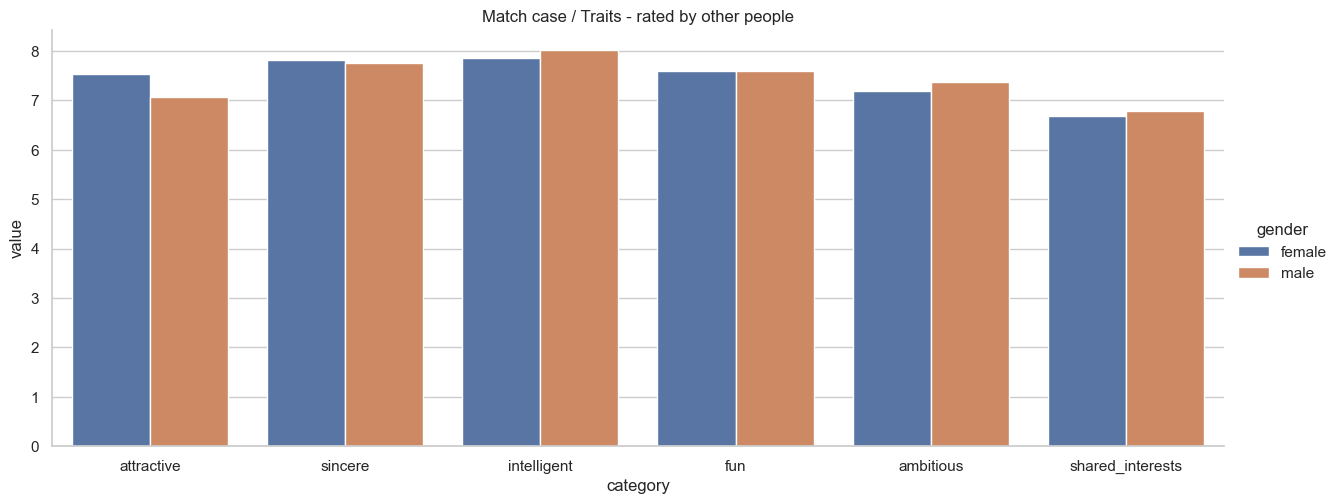

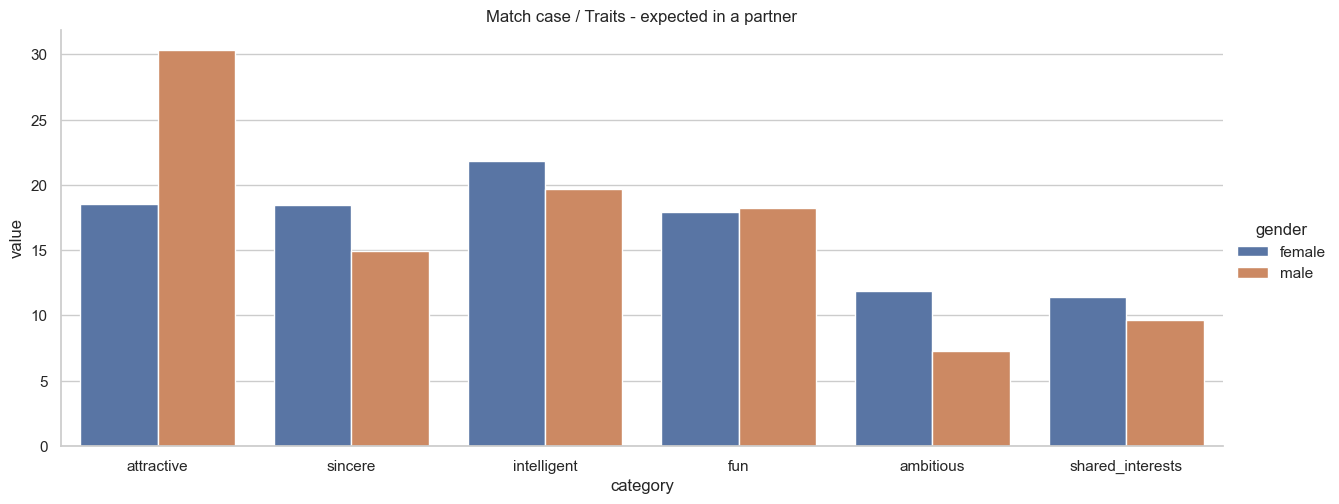

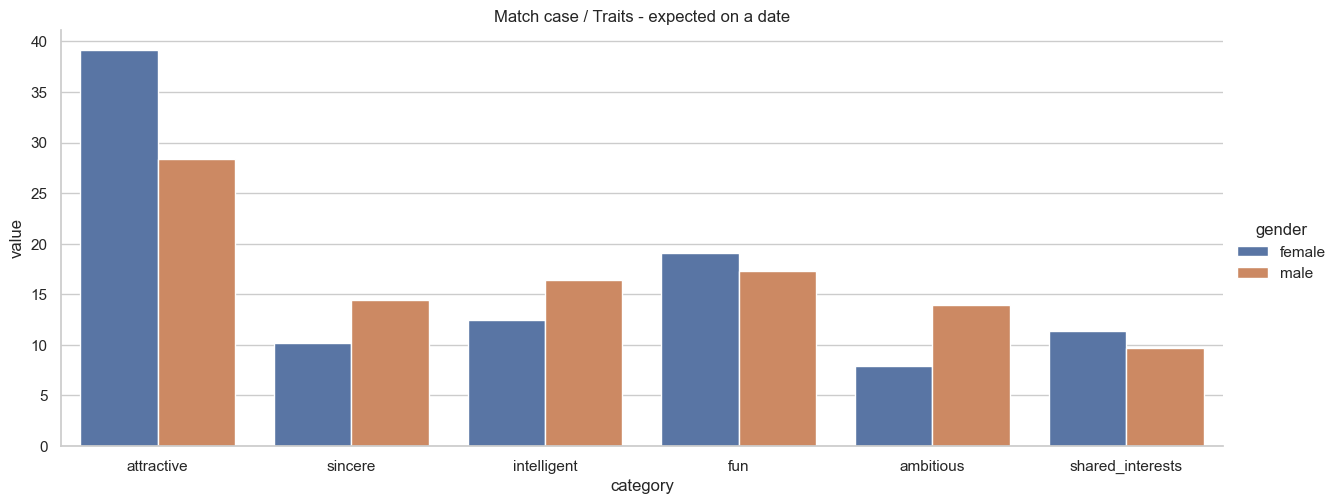

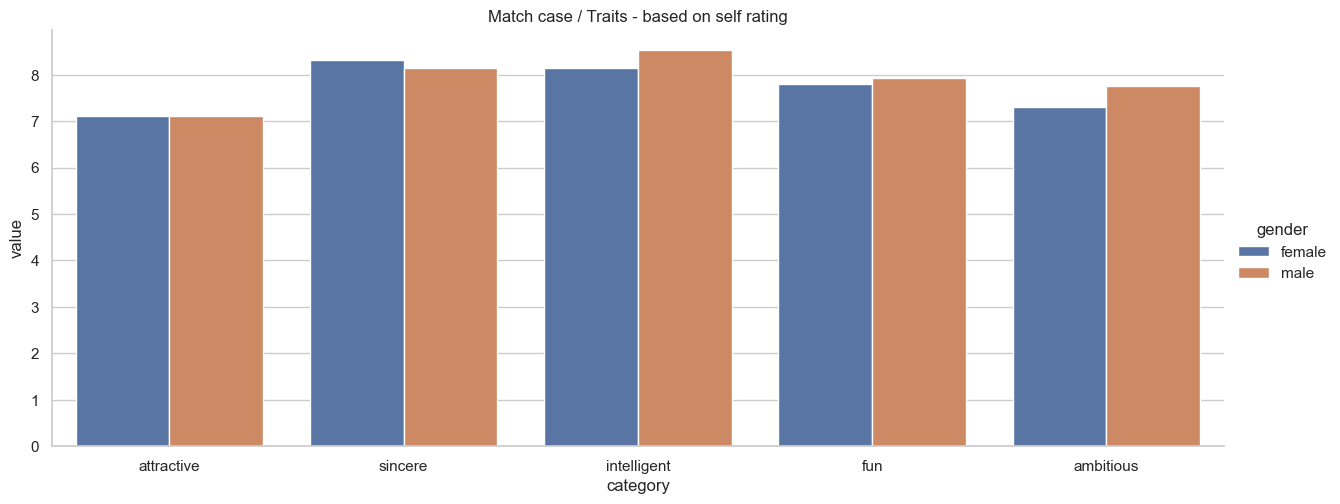

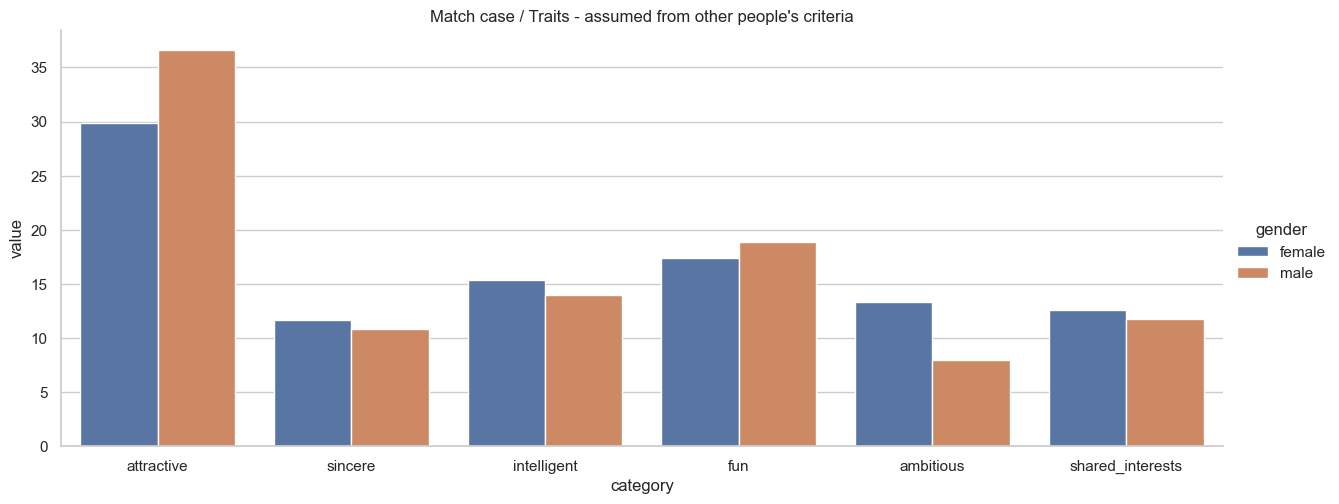

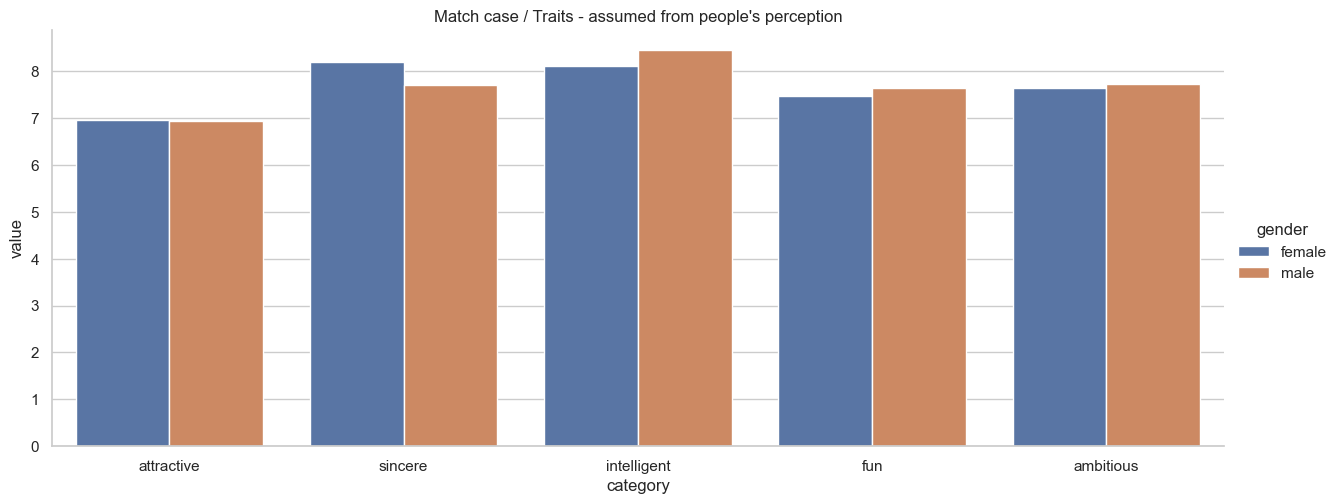

In [103]:
ax= sns.catplot(df_mean_0_0, x="category", y="value", hue="gender", kind="bar", aspect=20/8).set(title="Match case / Traits - rated by other people")
ax= sns.catplot(df_mean_1_1, x="category", y="value", hue="gender", kind="bar", aspect=20/8).set(title="Match case / Traits - expected in a partner")
ax= sns.catplot(df_mean_2_1, x="category", y="value", hue="gender", kind="bar", aspect=20/8).set(title="Match case / Traits - expected on a date")
ax= sns.catplot(df_mean_3_1, x="category", y="value", hue="gender", kind="bar", aspect=20/8).set(title="Match case / Traits - based on self rating")
ax= sns.catplot(df_mean_4_1, x="category", y="value", hue="gender", kind="bar", aspect=20/8).set(title="Match case / Traits - assumed from other people's criteria")
ax= sns.catplot(df_mean_5_1, x="category", y="value", hue="gender", kind="bar", aspect=20/8).set(title="Match case / Traits - assumed from people's perception")
plt.show()